# Optimal Lap Time

In [1]:
# Put parent folder in the pythonpath
import sys,os,inspect

import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))))
import fastest_lap
from fastest_lap import KMH

In [2]:
# Load vehicle
vehicle = "car"
fastest_lap.create_vehicle_from_xml(vehicle,"../../../../database/vehicles/kart/roberto-lot-kart-2016.xml");

In [3]:
# Load track
track="vendrell"
fastest_lap.create_track_from_xml(track,"../../../../database/tracks/vendrell/vendrell.xml");
s = fastest_lap.track_download_data(track, "arclength");

In [4]:
# Compute optimal laptime
options  = "<options>"
options += "    <output_variables>"
options += "        <prefix>run/</prefix>"
options += "        <variables>"
options += "            <chassis.position.x/>"
options += "            <chassis.position.y/>"
options += "            <front-axle.steering-angle/>"
options += "            <rear-axle.throttle/>"
options += "            <chassis.velocity.x/>"
options += "            <road.arclength/>"
options += "            <time/>"
options += "            <chassis.attitude.yaw/>"
options += "            <chassis.omega.z/>"
options += "            <chassis.velocity.y/>"
options += "        </variables>"
options += "    </output_variables>"
options += "    <print_level> 5 </print_level>"
options += "</options>"

fastest_lap.optimal_laptime(vehicle,track,s,options);

x        = fastest_lap.download_vector("run/chassis.position.x");
y        = fastest_lap.download_vector("run/chassis.position.y");
delta    = fastest_lap.download_vector("run/front-axle.steering-angle");
throttle = fastest_lap.download_vector("run/rear-axle.throttle");
u        = fastest_lap.download_vector("run/chassis.velocity.x");
s        = fastest_lap.download_vector("run/road.arclength");
time     = fastest_lap.download_vector("run/time");
psi      = fastest_lap.download_vector("run/chassis.attitude.yaw");
omega    = fastest_lap.download_vector("run/chassis.omega.z");
v        = fastest_lap.download_vector("run/chassis.velocity.y");

## GPS

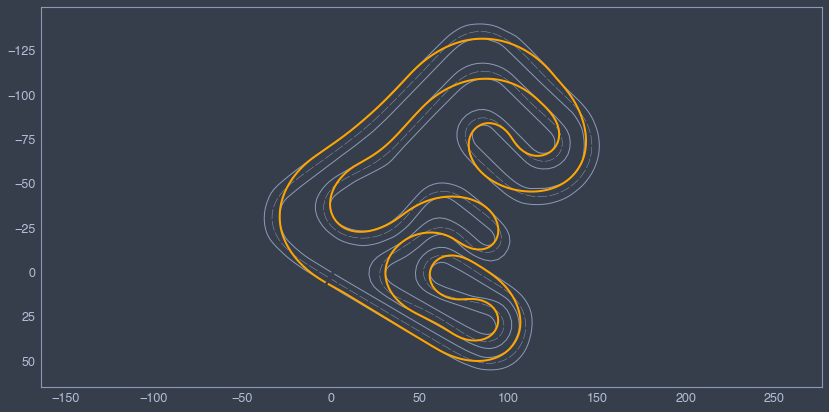

In [5]:
fastest_lap.plot_optimal_laptime(s,x,y,track);
plt.gca().invert_yaxis();

## Steering

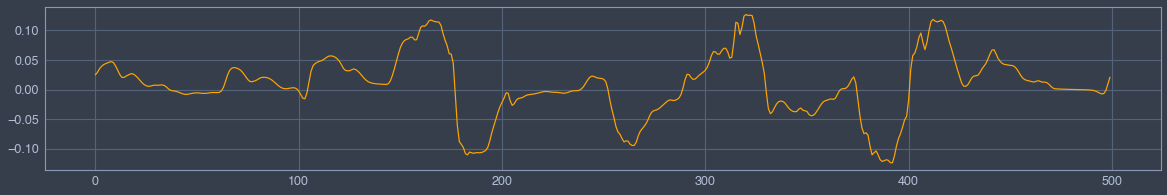

In [6]:
plt.figure(figsize=(20,3))
plt.plot(delta,color="orange");

## Torque

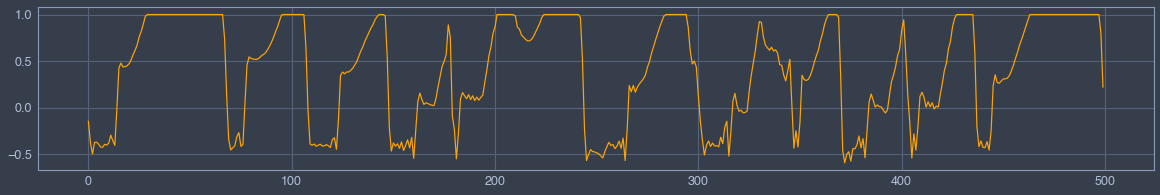

In [7]:
plt.figure(figsize=(20,3))
plt.plot(throttle,color="orange");